# Discrete Metric in Natural Language Processing
Jimmy Hickey


# Motivation

A metric is needed to compare two strings. 

How similar are "noodle" and "poodle"? "waddle" and "swaddle"? "obviously" and "the worst word ever"?

# The Discrete Metric
$\delta(x, y) =
\begin{cases} 
      1 & \text{if } x \neq y \\
      0 & \text{if } x = y
   \end{cases}$

# My Application of the Metric

* If a letter is missing, add it.

* If there is an extra letter, remove it.

* If a letter is different, change it.

* If the letter is correct leave it.

$\delta =
\begin{cases} 
      1 & Missing \\
      1 & Remove \\
      1 & Different\\
      0 & Correct
   \end{cases}$
   
The minimum _edit distance_ is the minimum path that can be taken from one string to another (i.e. making the least changes).

## Example

Poodle and noodle are one letter different (the first), so the minimum edit distance is 1.

In [1]:
x = "noodle"
y = "poodle"
prettyOutput(x,y)

NameError: name 'prettyOutput' is not defined

In [20]:
def editDistanceDynamic(x, y):
    matrix = []

    # Make |x| by |y| matrix
    for i in range(len(x) + 1):
        matrix.append([0]* (len(y) +1))

    for i in range(len(x)+1):
        matrix[i][0] = i

    for i in range(len(y)+1):
        matrix[0][i] = i
    
    for i in range(1, len(x) + 1):
        for j in range(1, len(y) + 1):
            distanceHor = matrix[i][j-1] + 1
            distanceVer = matrix[i-1][j] + 1
            # Discrete Metric
            if x[i-1] == y[j-1]:
                distanceDia = matrix[i-1][j-1]
            else:
                distanceDia = matrix[i-1][j-1] + 1
            matrix[i][j] = min(distanceHor, distanceVer, distanceDia)
    return matrix

In [6]:
def findShortestPath(m):
    path = [(0,0)]
    nrows = len(m)
    ncols = len(m[0])
    position = [0,0]
    
    while not path[-1][0] >= nrows-1 and not path[-1][1] >= ncols-1:
        distanceHor = m[min(position[0], nrows-1)][min(position[1] + 1, ncols-1)]
        distanceVer = m[min(position[0]+1, nrows-1)][min(position[1], ncols-1)]
        distanceDia = m[min(position[0]+1, nrows-1)][min(position[1] + 1, ncols-1)]
        
        if min(distanceHor, distanceVer, distanceDia) == distanceDia:
            path.append((position[0]+1, position[1]+1))
            position[0] = min(position[0] + 1, nrows-1)
            position[1] = min(position[1] +1, ncols -1)
        elif min(distanceHor, distanceVer, distanceDia) == distanceHor:
            path.append((position[0], position[1] + 1))
            position[1] = min(position[1] +1, ncols -1)
        else:
            path.append((position[0]+1, position[1]))
            position[0] = min(position[0] + 1, nrows-1)
        
    while not path[-1][0] == nrows-1:
        path.append((path[-1][0]+1,path[-1][1]))
    while not path[-1][1] == ncols-1:
        path.append((path[-1][0], path[-1][1]+1))
    
    return path

In [7]:
import pandas as pd
def prettyOutput(x, y):
    xlist = [" "] + list(x)
    ylist = [" "] + list(y)

    myMatrix = editDistanceDynamic(x,y)
    df = pd.DataFrame(myMatrix, index = xlist, columns = ylist)
    print("Minimum Distance: ", myMatrix[-1][-1])
    print(df)
    print("Path: ", findShortestPath(myMatrix))
    

In [8]:
x = "Hi~-Jimmy"
y = "h~-jimy"
prettyOutput(x, y)

Minimum Distance:  4
      h  ~  -  j  i  m  y
   0  1  2  3  4  5  6  7
H  1  1  2  3  4  5  6  7
i  2  2  2  3  4  4  5  6
~  3  3  2  3  4  5  5  6
-  4  4  3  2  3  4  5  6
J  5  5  4  3  3  4  5  6
i  6  6  5  4  4  3  4  5
m  7  7  6  5  5  4  3  4
m  8  8  7  6  6  5  4  4
y  9  9  8  7  7  6  5  4
Path:  [(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 7)]


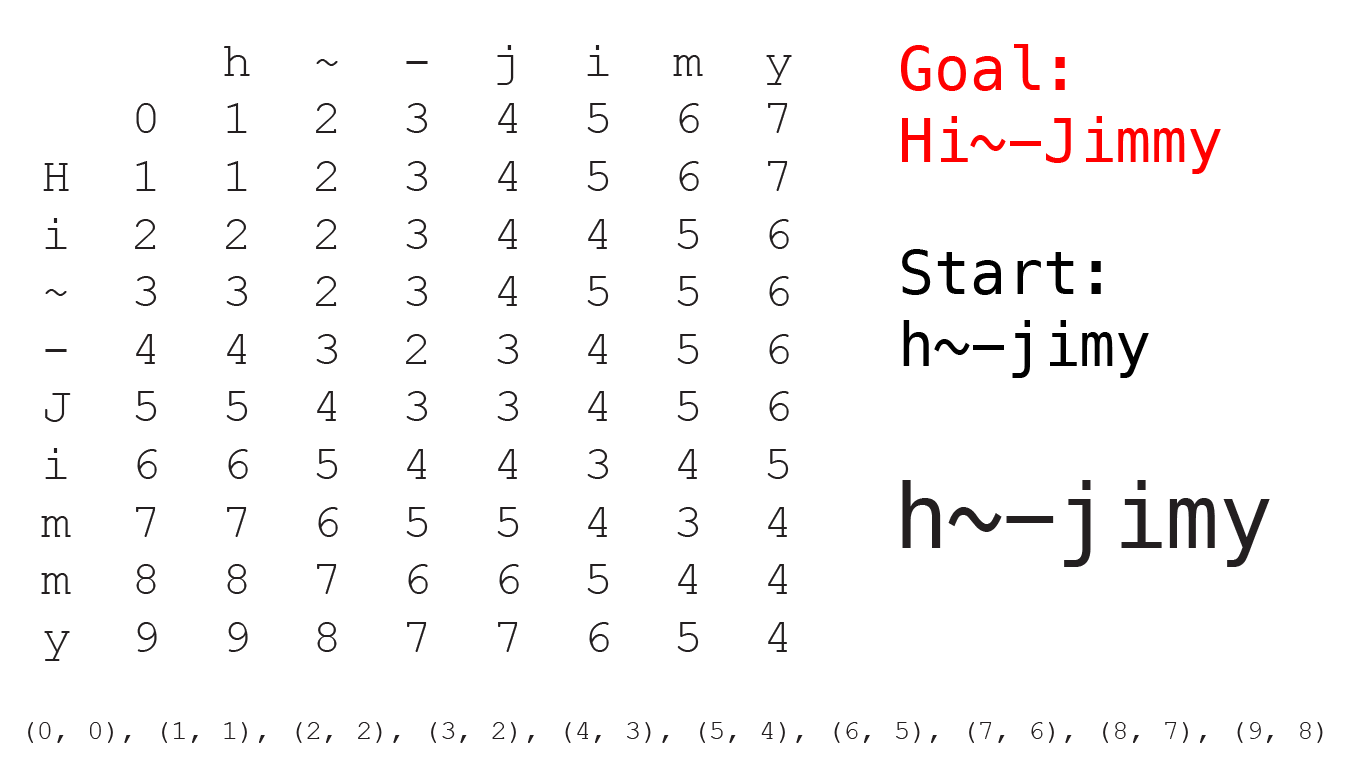

In [27]:
x = "waddle"
y = "swaddle"
prettyOutput(x,y)

Minimum Distance:  1
      s  w  a  d  d  l  e
   0  1  2  3  4  5  6  7
w  1  1  1  2  3  4  5  6
a  2  2  2  1  2  3  4  5
d  3  3  3  2  1  2  3  4
d  4  4  4  3  2  1  2  3
l  5  5  5  4  3  2  1  2
e  6  6  6  5  4  3  2  1
Path:  [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]


In [23]:
x = "obviously"
y = "the worst word ever"
prettyOutput(x,y)

Minimum Distance:  17
      T  h  e     W  o  r  s  t       W   o   r   d       E   v   e   r
   0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19
O  1  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19
b  2  2  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19
v  3  3  3  3  4  5  6  7  8  9  10  11  12  13  14  15  16  16  17  18
i  4  4  4  4  4  5  6  7  8  9  10  11  12  13  14  15  16  17  17  18
o  5  5  5  5  5  5  5  6  7  8   9  10  11  12  13  14  15  16  17  18
u  6  6  6  6  6  6  6  6  7  8   9  10  11  12  13  14  15  16  17  18
s  7  7  7  7  7  7  7  7  6  7   8   9  10  11  12  13  14  15  16  17
l  8  8  8  8  8  8  8  8  7  7   8   9  10  11  12  13  14  15  16  17
y  9  9  9  9  9  9  9  9  8  8   8   9  10  11  12  13  14  15  16  17
Path:  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19)]


In [9]:
x = "Jimmy is "
y = "Jimmy is cool"
prettyOutput(x,y)

Minimum Distance:  4
      J  i  m  m  y     i  s      c   o   o   l
   0  1  2  3  4  5  6  7  8  9  10  11  12  13
J  1  0  1  2  3  4  5  6  7  8   9  10  11  12
i  2  1  0  1  2  3  4  5  6  7   8   9  10  11
m  3  2  1  0  1  2  3  4  5  6   7   8   9  10
m  4  3  2  1  0  1  2  3  4  5   6   7   8   9
y  5  4  3  2  1  0  1  2  3  4   5   6   7   8
   6  5  4  3  2  1  0  1  2  3   4   5   6   7
i  7  6  5  4  3  2  1  0  1  2   3   4   5   6
s  8  7  6  5  4  3  2  1  0  1   2   3   4   5
   9  8  7  6  5  4  3  2  1  0   1   2   3   4
Path:  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13)]


In [10]:
x = "We all like Jimmy"
y = "We all love Jimmy"
prettyOutput(x,y)

Minimum Distance:  2
        W   e       a   l   l      l  o   v   e       J   i   m   m   y
    0   1   2   3   4   5   6   7  8  9  10  11  12  13  14  15  16  17
W   1   0   1   2   3   4   5   6  7  8   9  10  11  12  13  14  15  16
e   2   1   0   1   2   3   4   5  6  7   8   9  10  11  12  13  14  15
    3   2   1   0   1   2   3   4  5  6   7   8   9  10  11  12  13  14
a   4   3   2   1   0   1   2   3  4  5   6   7   8   9  10  11  12  13
l   5   4   3   2   1   0   1   2  3  4   5   6   7   8   9  10  11  12
l   6   5   4   3   2   1   0   1  2  3   4   5   6   7   8   9  10  11
    7   6   5   4   3   2   1   0  1  2   3   4   5   6   7   8   9  10
l   8   7   6   5   4   3   2   1  0  1   2   3   4   5   6   7   8   9
i   9   8   7   6   5   4   3   2  1  1   2   3   4   5   5   6   7   8
k  10   9   8   7   6   5   4   3  2  2   2   3   4   5   6   6   7   8
e  11  10   9   8   7   6   5   4  3  3   3   2   3   4   5   6   7   8
   12  11  10   9   8   7   6   5  4  4   4

# Molecular Biology
DNA makes very long strands, however examining short segments offers a lot of information. Segments that are similar often exhibit similar characteristics.

In [11]:
x = "CACCTGACCGGGACAGGACCCT"
y = "CACCTGGGATTACGGCCT"
prettyOutput(x,y)

Minimum Distance:  9
        C   A   C   C   T   G   G   G   A   T   T   A   C   G   G   C   C   T
    0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
C   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
A   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
C   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
C   4   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
T   5   4   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13
G   6   5   4   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12
A   7   6   5   4   3   2   1   1   2   2   3   4   5   6   7   8   9  10  11
C   8   7   6   5   4   3   2   2   2   3   3   4   5   5   6   7   8   9  10
C   9   8   7   6   5   4   3   3   3   3   4   4   5   5   6   7   7   8   9
G  10   9   8   7   6   5   4   3   3   4   4   5   5   6   5   6   7   8   9
G  11  10   9   8   7   6   5   4   3   4  

# Something you should never do...

In [33]:
x = "Jimmy has a really good presentation"
y = "Jimmy is the best"
prettyOutput(x,y)

Minimum Distance:  23
        J   i   m   m   y       i   s       t   h   e       b   e   s   t
    0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
J   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
i   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
m   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
m   4   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12  13
y   5   4   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11  12
    6   5   4   3   2   1   0   1   2   3   4   5   6   7   8   9  10  11
h   7   6   5   4   3   2   1   1   2   3   4   4   5   6   7   8   9  10
a   8   7   6   5   4   3   2   2   2   3   4   5   5   6   7   8   9  10
s   9   8   7   6   5   4   3   3   2   3   4   5   6   6   7   8   8   9
   10   9   8   7   6   5   4   4   3   2   3   4   5   6   7   8   9   9
a  11  10   9   8   7   6   5   5   4   3   3   4   5   6   7   8   9  10
   12  11  10   

###### I hope that worked.

# Now with words!

In [12]:
def editDistanceWordDynamic(x, y):
    matrix = []

    xWords = x.split()
    yWords = y.split()
    
    # Make |x| by |y| matrix
    for i in range(len(xWords) + 1):
        matrix.append([0]* (len(yWords) +1))

    for i in range(len(xWords)+1):
        matrix[i][0] = i

    for i in range(len(yWords)+1):
        matrix[0][i] = i
        
        
    for i in range(1, len(xWords) + 1):
        for j in range(1, len(yWords) + 1):
            distanceHor = matrix[i][j-1] + 1
            distanceVer = matrix[i-1][j] + 1
            # Discrete Metric
            if xWords[i-1] == yWords[j-1]:
                distanceDia = matrix[i-1][j-1]
            else:
                distanceDia = matrix[i-1][j-1] + 1
            matrix[i][j] = min(distanceHor, distanceVer, distanceDia)
    return matrix[-1][-1]

In [26]:
s1 = "Jimmy is super cool"
s2 = "Jimmy is the best"

x = s1.split()
y = s2.split()

print(editDistanceWordDynamic(s1,s2))

2


![Hemingway_v_Kafka.png](Hemingway_v_Kafka.png)



In [17]:
import datetime
with open('TheOldManAndTheSea.txt', 'r') as myfile:
    TheOldManAndTheSea=myfile.read().replace('\n', '')
    
with open('Metamorphosis.txt', 'r') as myfile:
    Metamorphosis=myfile.read().replace('\n', '')

print("The number of words in The Old Man And The Sea:\t", len(TheOldManAndTheSea.split()))
print("The number of words in Metamorphosis:\t\t", len(Metamorphosis.split()))
print("Entries in matrix:\t\t\t\t", len(TheOldManAndTheSea.split()) * len(Metamorphosis.split()))

before = datetime.datetime.now()
plagiarism = editDistanceWordDynamic(TheOldManAndTheSea, Metamorphosis)
after = datetime.datetime.now()
print("The Old Man and the Sea and Metamorphosis are ", plagiarism, " words different.")
print("Computation time: ", after-before )

The number of words in The Old Man And The Sea:	 24388
The number of words in Metamorphosis:		 21994
Entries in matrix:				 536389672
The Old Man and the Sea and Metamorphosis are  22922  words different.
Computation time:  0:11:30.730314


In [19]:
with open('nineteen84.txt', 'r') as myfile:
    nineteen84=myfile.read().replace('\n', '')
    
with open('Frankenstein.txt', 'r') as myfile:
    frankenstein=myfile.read().replace('\n', '')

print("The number of words in nineteen84:\t\t", len(nineteen84.split()))
print("The number of words in frankenstein:\t\t", len(frankenstein.split()))
print("Entries in matrix:\t\t\t\t", len(nineteen84.split()) * len(frankenstein.split()))

# plagiarism = editDistanceWordDynamic(nineteen84, frankenstein)

The number of words in nineteen84:		 94710
The number of words in frankenstein:		 74241
Entries in matrix:				 7031365110


In [15]:
with open('MobyDick.txt', 'r') as myfile:
    mobyDick=myfile.read().replace('\n', '')
    
with open('PrideAndPrejudice.txt', 'r') as myfile:
    prideAndPrejudice=myfile.read().replace('\n', '')

print("The number of words in Moby Dick:\t\t", len(mobyDick.split()))
print("The number of words in Pride and Prejudice:\t", len(prideAndPrejudice.split()))
print("Entries in matrix:\t\t\t\t", len(mobyDick.split()) * len(prideAndPrejudice.split()))
 
# plagiarism = editDistanceWordDynamic(mobyDick, prideAndPrejudice)

The number of words in Moby Dick:		 110927
The number of words in Pride and Prejudice:	 110849
Entries in matrix:				 12296147023


# Changes and Improvements

* Support punctuation
* Support capitalization
* Improve the algorithm
* Change the metric

# Further applications

* Plagiarism check
* Spell check

# Credits
Pride and Prejudice text: http://www.gutenberg.org/files/1342/1342.txt

The Old Man and the Sea text: https://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt

Metamorphosis text: https://www.gutenberg.org/files/5200/5200-h/5200-h.htm

Moby Dick text: https://gist.github.com/StevenClontz/4445774

1984 text: http://gutenberg.net.au/ebooks01/0100021.txt

Frankenstein text: https://www.gutenberg.org/files/84/84-h/84-h.htm

### Photo Credit:

https://www.quora.com/What-is-the-deeper-meaning-of-Franz-Kafkas-The-Metamorphosis

https://www.barnesandnoble.com/w/old-man-and-the-sea-ernest-hemingway/1100300820